# Jupyter Notebook

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


# Summary
ADP, or average draft position, is a metric that measures the average place of draft pick of the players out of both mock and real draft data. For instance, if a player has an ADP of 7.0, it means that on average, that player is the 7th pick out of the draft. ADP can be valuable in that it provides insights on how other people value the respective players. However, since ADP is a predictive metric, there will most likely be “breakout players”, or players that will outperform their pre-season ranking. We aim to identify these breakout players, players with more than 150 ADP and below post-season 50th rank, and find if there are common characteristics among these breakout players.

In [10]:
#overall adp files
# overall_adp_2022 = pd.read_csv('data/pre-season data/FantasyPros_2022_Overall_ADP_Rankings.csv')
overall_adp_2021 = pd.read_csv('data/pre-season data/FantasyPros_2021_Overall_ADP_Rankings.csv')
overall_adp_2021['Year'] = '2021'

overall_adp_2020 = pd.read_csv('data/pre-season data/FantasyPros_2020_Overall_ADP_Rankings.csv')
overall_adp_2020['Year'] = '2020'

overall_adp_2019 = pd.read_csv('data/pre-season data/FantasyPros_2019_Overall_ADP_Rankings.csv')
overall_adp_2019['Year'] = '2019'

overall_adp_2018 = pd.read_csv('data/pre-season data/FantasyPros_2018_Overall_ADP_Rankings.csv')
overall_adp_2018['Year'] = '2018'

overall_adp_2017 = pd.read_csv('data/pre-season data/FantasyPros_2017_Overall_ADP_Rankings.csv')
overall_adp_2017['Year'] = '2017'

overall_adp_2016 = pd.read_csv('data/pre-season data/FantasyPros_2016_Overall_ADP_Rankings.csv')
overall_adp_2016['Year'] = '2016'

overall_adp_2015 = pd.read_csv('data/pre-season data/FantasyPros_2015_Overall_ADP_Rankings.csv')
overall_adp_2015['Year'] = '2015'

overall_adp_2014 = pd.read_csv('data/pre-season data/FantasyPros_2014_Overall_ADP_Rankings.csv')
overall_adp_2014['Year'] = '2014'

overall_adp_2013 = pd.read_csv('data/pre-season data/FantasyPros_2013_Overall_ADP_Rankings.csv')
overall_adp_2013['Year'] = '2013'

In [11]:
#wide receiver stats
wr_stats_2021 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2021.csv')
wr_stats_2020 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2020.csv')
wr_stats_2019 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2019.csv')
wr_stats_2018 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2018.csv')
wr_stats_2017 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2017.csv')
wr_stats_2016 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2016.csv')
wr_stats_2015 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2015.csv')
wr_stats_2014 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2014.csv')
wr_stats_2013 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2013.csv')
wr_stats_2019.head()

,Rank,Player,G,REC,YDS,Y/R,YBC,YBC/R,AIR,AIR/R,...,% TM,CATCHABLE,DROP,RZ TGT,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,LNG
0,1.0,Michael Thomas (NO),16.0,149.0,"1,725",11.6,"1,142",7.7,"1,142",7.7,...,33.1%,157.0,6.0,22.0,73.0,17.0,5.0,3.0,0.0,49.0
1,2.0,Chris Godwin (TB),14.0,86.0,"1,333",15.5,756,8.8,756,8.8,...,19.9%,89.0,1.0,13.0,57.0,25.0,8.0,3.0,2.0,71.0
2,3.0,Kenny Golladay (NYG),16.0,65.0,"1,190",18.3,886,13.6,886,13.6,...,21.1%,71.0,6.0,15.0,43.0,22.0,12.0,6.0,3.0,75.0
3,4.0,Cooper Kupp (LAR),16.0,94.0,"1,161",12.4,623,6.6,623,6.6,...,21.9%,98.0,3.0,18.0,41.0,21.0,5.0,4.0,3.0,66.0
4,5.0,Julio Jones (TB),15.0,99.0,"1,394",14.1,"1,030",10.4,"1,030",10.4,...,24.0%,108.0,4.0,16.0,62.0,21.0,8.0,3.0,2.0,54.0


In [12]:
#wr large dataset
wr_table = pd.concat([wr_stats_2021,wr_stats_2020,wr_stats_2019,wr_stats_2018,wr_stats_2017,wr_stats_2016,wr_stats_2015,wr_stats_2014,wr_stats_2013])

In [13]:
#end of season overall rankings 
overall_rankings_2021 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2021.csv')
overall_rankings_2021['Year'] = '2021'

overall_rankings_2020 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2020.csv')
overall_rankings_2020['Year'] = '2020'

overall_rankings_2019 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2019.csv')
overall_rankings_2019['Year'] = '2019'

overall_rankings_2018 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2018.csv')
overall_rankings_2018['Year'] = '2018'

overall_rankings_2017 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2017.csv')
overall_rankings_2017['Year'] = '2017'

overall_rankings_2016 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2016.csv')
overall_rankings_2016['Year'] = '2016'

overall_rankings_2015 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2015.csv')
overall_rankings_2015['Year'] = '2015'

overall_rankings_2014 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2014.csv')
overall_rankings_2014['Year'] = '2014'

overall_rankings_2013 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2013.csv')
overall_rankings_2013['Year'] = '2013'

# overall_rankings_2012 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2012.csv')
display(overall_rankings_2019.head(5))

,Rank,Player,Team,Position,Points,Games,Avg,Year
0,1.0,Christian McCaffrey,CAR,RB,471.2,16.0,29.5,2019
1,2.0,Lamar Jackson,BAL,QB,421.7,15.0,28.1,2019
2,3.0,Michael Thomas,NO,WR,374.6,16.0,23.4,2019
3,4.0,Dak Prescott,DAL,QB,348.9,16.0,21.8,2019
4,5.0,Jameis Winston,TB,QB,335.2,16.0,21.0,2019


In [14]:
#giant datatable final
adp_table = pd.concat([overall_adp_2021, overall_adp_2020, overall_adp_2019, overall_adp_2018, overall_adp_2017, overall_adp_2016, overall_adp_2015, overall_adp_2014, overall_adp_2013], axis=0)
overall_rankings_table = pd.concat([overall_rankings_2021, overall_rankings_2020, overall_rankings_2019, overall_rankings_2018, overall_rankings_2017, overall_rankings_2016, overall_rankings_2015, overall_rankings_2014, overall_rankings_2013], axis=0)
overall_merged = adp_table.merge(overall_rankings_table, how= 'outer', on = ['Player', 'Year'])

overall_merged

,Rank_x,Player,Team_x,Bye,POS,MFL,Fantrax,RTSports,FFC,Sleeper,AVG,Year,ESPN,Rank_y,Team_y,Position,Points,Games,Avg
0,1.0,Christian McCaffrey,SF,6,RB1,1.0,1.0,NaN,1.0,1.0,1.0,2021,NaN,168.0,CAR,RB,127.5,7.0,18.2
1,2.0,Dalvin Cook,MIN,7,RB2,2.0,2.0,NaN,2.0,2.0,2.0,2021,NaN,68.0,MIN,RB,206.3,13.0,15.9
2,3.0,Derrick Henry,TEN,13,RB3,3.0,3.0,NaN,3.0,3.0,3.0,2021,NaN,79.0,TEN,RB,193.3,8.0,24.2
3,4.0,Alvin Kamara,NO,6,RB4,4.0,4.0,NaN,4.0,4.0,4.0,2021,NaN,48.0,NO,RB,234.7,13.0,18.1
4,5.0,Ezekiel Elliott,DAL,7,RB5,5.0,5.0,NaN,5.0,5.0,5.0,2021,NaN,35.0,DAL,RB,252.1,17.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,NaN,Tyler Clutts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,651.0,Multi,RB,-0.6,7.0,-0.1
6840,NaN,Chase Daniel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,653.0,KC,QB,-0.8,4.0,-0.2
6841,NaN,Devon Wylie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,655.0,TEN,WR,-2.0,2.0,-1.0
6842,NaN,Greg Jenkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,655.0,LV,WR,-2.0,5.0,-0.4


In [15]:
#cleaned overall_merged_data df
# dropped 'RTSports' and 'Sleeper' column - Had a lot of NaN values 
# dropped 'MFL','Fantrax', and 'FFC'
# dropped 'POS', Team_y - duplicated from merging 
# sort for wide receiver
# take out people with NaN ADP

def clean_data(data_file):
    data_file2 = data_file.drop(columns=['RTSports', 'Sleeper', 'MFL', 'Fantrax', 'FFC', 'POS','Team_y', 'ESPN', 'Bye', 'Team_x'])
    data_file3 = data_file2.rename(columns = {"Rank_x": "Preseason_rank","Team_x":"Team", "Rank_y": "Postseason_rank", "AVG": "ADP", "Avg": "PPG"})
    data_file4 = data_file3.loc[data_file3.Position == 'WR']
    data_file5 = data_file4.dropna(subset=['ADP'])
    return data_file5

overall_merged_data_clean = clean_data(overall_merged)
overall_merged_data_clean

,Preseason_rank,Player,ADP,Year,Postseason_rank,Position,Points,Games,PPG
7,8.0,Davante Adams,8.3,2021,8.0,WR,344.3,16.0,21.5
10,11.0,Tyreek Hill,11.0,2021,21.0,WR,296.5,17.0,17.4
15,16.0,Stefon Diggs,16.3,2021,23.0,WR,285.5,17.0,16.8
17,18.0,DK Metcalf,18.5,2021,39.0,WR,244.3,17.0,14.4
19,20.0,DeAndre Hopkins,19.8,2021,132.0,WR,147.2,10.0,14.7
...,...,...,...,...,...,...,...,...,...
3892,454.0,Stedman Bailey,458.0,2013,345.0,WR,41.6,15.0,2.8
3910,472.0,Eddie Royal,476.0,2013,119.0,WR,144.1,14.0,10.3
3914,476.0,Marvin Jones Jr.,480.0,2013,82.0,WR,171.6,15.0,11.4
3917,479.0,Jerricho Cotchery,483.0,2013,104.0,WR,154.2,15.0,10.3


In [20]:
# find breakout players by finding players that have ADP Greater Than 150 AND Post-Season Rk of Less Than 50
cond_ = (overall_merged_data_clean["ADP"] > 150) & (overall_merged_data_clean["Postseason_rank"] < 50)
overall_merged_data_clean.loc[cond_,:]

,Preseason_rank,Player,ADP,Year,Postseason_rank,Position,Points,Games,PPG
331,332.0,Hunter Renfrow,296.0,2021,30.0,WR,259.1,17.0,15.2
1214,207.0,DeVante Parker,172.5,2019,40.0,WR,246.2,16.0,15.4
1563,148.0,Tyler Lockett,158.4,2018,49.0,WR,222.4,16.0,13.9
2402,146.0,Michael Thomas,155.0,2016,29.0,WR,255.7,15.0,17.1
2447,191.0,Davante Adams,181.2,2016,34.0,WR,246.7,16.0,15.4
2890,156.0,Michael Crabtree,161.2,2015,45.0,WR,231.2,16.0,14.5
2903,168.0,Doug Baldwin,161.2,2015,27.0,WR,268.9,16.0,16.8
3406,239.0,Odell Beckham Jr.,192.0,2014,17.0,WR,295.0,12.0,24.6
3659,225.0,Julian Edelman,224.5,2013,36.0,WR,234.2,15.0,15.6


<AxesSubplot:xlabel='ADP', ylabel='Postseason_rank'>

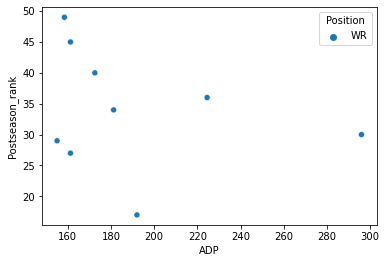

In [21]:
sns.scatterplot(data = overall_merged_data_clean.loc[cond_,:], x = 'ADP', y = 'Postseason_rank', hue = 'Position')

In [10]:
#merged dataset of Wide Receivers in 2019 
#more data analysis - several models to be used 
#what other analysis can we do 
# define variable to address NaN values 



In [11]:
#merged dataset of Running Back in 2019 

In [12]:
#merged dataset of Quarter Back in 2019 

In [13]:
# merge dataset if clean; clean as much as data possible; remove data files; 
#nyc opendata - for examples of clean dataset
#prediction model on which player is going to be a breakout player
#cluster of everyone else; cluster of busts; cluster of breakout players
# another column that indicates that they are breakout players 
# https://www.kaggle.com/code/davidvilensky/mf-and-etfs-analysis/notebook - example to reference to 

# Data Citation
Pre-season data 
- 